In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# parámetros
R_real = 105     # resistencia en ohmios
C_real = 1e-3    # capacitancia en faradios
L = 0.5          # inductancia en henrios
T = 10           # tiempo (s) total de simulación

# constantes del sistema
LC_real = 1 / (L * C_real)
RL_real = R_real / L

# parámtros de integración
h = min(LC_real / 10, T / 10000)    # paso de integración estable
N = int(T / h)                      # númerp de iteraciones
t = np.linspace(0, T, N)            # vector de tiempo

# función senoidad de 2.5 Hz
def Vin(t):
    return np.sin(5 * np.pi * t)

In [18]:
# inicializar las variables
x1_real = np.zeros(N)  # Voltaje en el capacitor (Vc)
x2_real = np.zeros(N)  # Corriente en el inductor (I)

for k in range(N - 1):
    x1_real[k + 1] = x1_real[k] + h * x2_real[k]
    x2_real[k + 1] = x2_real[k] + h * (-RL_real * x2_real[k] - LC_real * x1_real[k] + LC_real * Vin(t[k]))

In [19]:
# Función de simulación de estado con parámetros R y C
def simulate_RLC(R, C):
    LC = 1 / (L * C)
    RL = R / L
    x1, x2 = np.zeros(N), np.zeros(N)
    for k in range(N - 1): # definición de las variables de estado
        x1[k + 1] = x1[k] + h * x2[k]
        x2[k + 1] = x2[k] + h * (-RL * x2[k] - LC * x1[k] + LC * Vin(t[k]))
    return x1, x2

In [20]:
# gradiente del error respecto a R y C
def gradiente(R, C):
    LC = 1 / (L * C)
    RL = R / L
    x1, x2 = np.zeros(N), np.zeros(N)
    d_x1_R, d_x2_R = np.zeros(N), np.zeros(N)
    d_x1_C, d_x2_C = np.zeros(N), np.zeros(N)

    for k in range(N - 1):
        x1[k + 1] = x1[k] + h * x2[k]
        x2[k + 1] = x2[k] + h * (-RL * x2[k] - LC * x1[k] + LC * Vin(t[k]))

        d_x1_R[k + 1] = d_x1_R[k] + h * d_x2_R[k]
        d_x2_R[k + 1] = d_x2_R[k] + h * (- (1 / L) * x2[k] - RL * d_x2_R[k] - LC * d_x1_R[k])

        d_LC_dC = -1 / (L * C**2)
        d_x1_C[k + 1] = d_x1_C[k] + h * d_x2_C[k]
        d_x2_C[k + 1] = d_x2_C[k] + h * (-RL * d_x2_C[k] - LC * d_x1_C[k] + d_LC_dC * (Vin(t[k]) - x1[k]))

    error = (x1_real - x1) + (x2_real - x2)
    grad_R = -np.sum(error * (d_x1_R + d_x2_R))
    grad_C = -np.sum(error * (d_x1_C + d_x2_C))
    return grad_R, grad_C

In [21]:
# gradiente
R_hat = 60.0
C_hat = 1e-3 

alpha_R = 0.05
alpha_C = 5e-7

tol_R = 0.1
tol_C = 1e-6

num_iter = 2000

for i in range(num_iter):
    grad_R, grad_C = gradiente(R_hat, C_hat)

    R_old, C_old = R_hat, C_hat

    R_hat -= alpha_R * grad_R
    C_hat -= alpha_C * grad_C

    # limites de R y C 
    R_hat = np.clip(R_hat, 1.0, 200.0)
    C_hat = np.clip(C_hat, 1e-5, 2e-3)

    # condicion de paro, que ambas se acoten bajo la tolerancia correspondiente
    if abs(R_hat - R_old) < tol_R and abs(C_hat - C_old) < tol_C:
        print(f"Convergencia alcanzada en iteración {i+1}")
        break

    if i % 10 == 0:
        print(f"Iter {i+1}: R_hat = {R_hat:.4f} Ω, C_hat = {C_hat:.6f} F")

print(f"\nEstimación final: R_hat = {R_hat:.4f} Ω, C_hat = {C_hat:.6f} F")
print(f"R_real = {R_real} Ω, C_real = {C_real} F")




Iter 1: R_hat = 200.0000 Ω, C_hat = 0.002000 F
Iter 11: R_hat = 154.9980 Ω, C_hat = 0.002000 F
Iter 21: R_hat = 156.3594 Ω, C_hat = 0.002000 F
Iter 31: R_hat = 187.4618 Ω, C_hat = 0.002000 F
Iter 41: R_hat = 135.5853 Ω, C_hat = 0.002000 F
Iter 51: R_hat = 137.0698 Ω, C_hat = 0.002000 F
Iter 61: R_hat = 173.0850 Ω, C_hat = 0.002000 F
Iter 71: R_hat = 200.0000 Ω, C_hat = 0.002000 F
Iter 81: R_hat = 154.9980 Ω, C_hat = 0.002000 F
Iter 91: R_hat = 156.3594 Ω, C_hat = 0.002000 F
Iter 101: R_hat = 187.4618 Ω, C_hat = 0.002000 F
Iter 111: R_hat = 135.5853 Ω, C_hat = 0.002000 F
Iter 121: R_hat = 137.0698 Ω, C_hat = 0.002000 F
Iter 131: R_hat = 173.0850 Ω, C_hat = 0.002000 F
Iter 141: R_hat = 200.0000 Ω, C_hat = 0.002000 F
Iter 151: R_hat = 154.9980 Ω, C_hat = 0.002000 F
Iter 161: R_hat = 156.3594 Ω, C_hat = 0.002000 F
Iter 171: R_hat = 187.4618 Ω, C_hat = 0.002000 F
Iter 181: R_hat = 135.5853 Ω, C_hat = 0.002000 F
Iter 191: R_hat = 137.0698 Ω, C_hat = 0.002000 F
Iter 201: R_hat = 173.0850 Ω, C

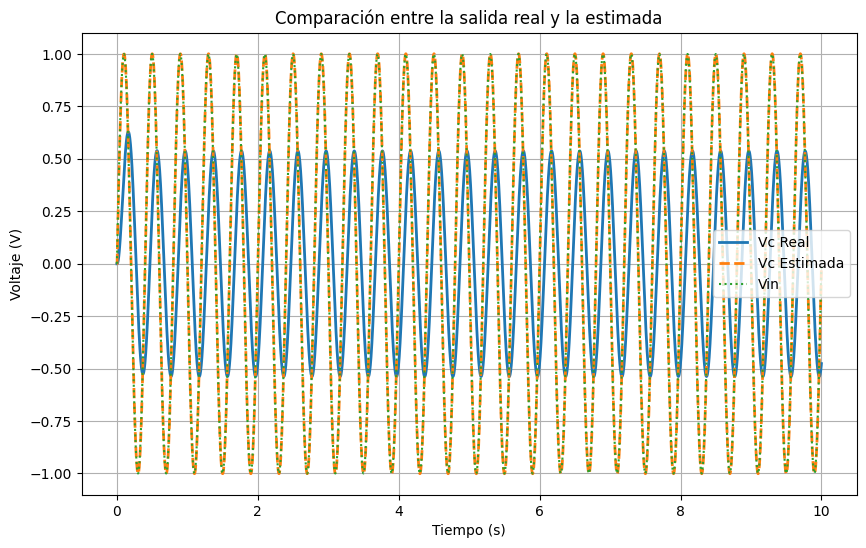

In [22]:
# gráfica de la respuesta estimada vs real
x1_est, x2_est = simulate_RLC(R_hat, C_hat)

plt.figure(figsize=(10, 6))
plt.plot(t, x1_real, label='Vc Real', linewidth=2)
plt.plot(t, x1_est, '--', label='Vc Estimada', linewidth=2)
plt.plot(t, Vin(t), ':', label='Vin', linewidth=1.5)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend()
plt.title('Comparación entre la salida real y la estimada')
plt.grid(True)
plt.show()